# 0. Prerequisite

# LAB

## 제출

구현한 코드가 담긴 colab 파일을 PLATO "실습 과제 제출 게시판"에 비밀글로 제출하세요.

## 1

> 문제 1
---
1. 주어진 danawa 맥북 리뷰를 데이터를 tensorflow 를 이용하여 텍스트 전처리 합니다.
2. 먼저, 빈도가 포함된 단어 사전을 구축합니다.
3. 주어진 문장을 단어 사전의 인덱스(숫자)로 변경합니다.
4. 숫자로 변경한 문장의 길이를 동일하게 맞춥니다.(패딩)
6. p.181 을 참고하여 주어진 문장을 이진 벡터로 변환 후 분류 모델 (긍정리뷰: 1, 부정리뷰: 0) 을 생성하시오. 


```python
reviews = [
    "8년 정도 사용하던 맥북을 바꿔줬어요. 요즘 휴대폰, 패드가 너무 잘나와서 맥북 쓸 일은 그렇게 많이 없긴 한데 그래도 없으면 불편하니 기변합니다. 프로 13인치 깡통은 에어에 비해 망작이라고들 말하는데 120만원대에 22개월 무이자라면 말이 다르죠ㅎㅎ 불편하다던 터치바도 생각보다 편리한 기능들이 많아서 꽤 마음에 듭니다. 터치 아이디도 편하구요. 전 모델은 팬이 없어서 발열이 심했는데 역시 팬이 있으니 발열도 심하지 않고 좋아요. 쾌적합니다.",
    "어제밤11시50분이 넘어서 주문했는데 오늘오후3시에 받았어요^^배송 너무 빨라서 놀랐고 가격도 할인을 정말 많이 받아서 저렴하게 구입했어요^^ 물건은 말할것도 없이 포장도 꼼꼼하고 아들이 정말 좋아해요^^ 잘쓰겠습니다~ 대박나시고 건강하세요^ 감사합니다",
    "맥북 사실때 주의 하셔야할 사항이 본체에 미세한 전기가 흐르는 사항 입니다. 이유는 접지가 없어서 그렇다고 하네요. 추가로 접지 가능한 플러그를 구매 하셔야 합니다. ㅠㅠ",
    "하이마트는 배송이 빨라서 좋다 기대도 안했는데 빨리 옴 하이마트는 전국 하이마트 지점 재고 네트워크가 잘 되어 있어서 그래서 더 빠른 듯 굿굿 애플은 하이마트",
    "구형 맥북 배터리 교환때문에 고민을 하던 찰나에 좋은 가격에 잘 구입했습니다. 역시 11번가 입니다",
    "슈팅 배송 맞구요. 스페이스그레이 가볍지 않고 너무 예뻐요. 그랜드11절 기다린 보람이 있네요.",
    "인터넷 서핑 동영상 음악 감상용으로 나쁘지않아요대신 영상작업이나 포토샵하기엔 아쉽습니다.",
    "배송도 진짜 빠르고 정말 좋습니다 추천 드려요",
    "좋은상품 저렴하게 잘 구매했습니다 감사합니다",
    "역시 맥북 최고입니다!!",
    "빠른배송에 만족합니다 잘 사용할게요",
    "오 너무 잘샀아요강추해요!"
]
```


In [ ]:
import tensorflow as tf

reviews = [
    "8년 정도 사용하던 맥북을 바꿔줬어요. 요즘 휴대폰, 패드가 너무 잘나와서 맥북 쓸 일은 그렇게 많이 없긴 한데 그래도 없으면 불편하니 기변합니다. 프로 13인치 깡통은 에어에 비해 망작이라고들 말하는데 120만원대에 22개월 무이자라면 말이 다르죠ㅎㅎ 불편하다던 터치바도 생각보다 편리한 기능들이 많아서 꽤 마음에 듭니다. 터치 아이디도 편하구요. 전 모델은 팬이 없어서 발열이 심했는데 역시 팬이 있으니 발열도 심하지 않고 좋아요. 쾌적합니다.",
    "어제밤11시50분이 넘어서 주문했는데 오늘오후3시에 받았어요^^배송 너무 빨라서 놀랐고 가격도 할인을 정말 많이 받아서 저렴하게 구입했어요^^ 물건은 말할것도 없이 포장도 꼼꼼하고 아들이 정말 좋아해요^^ 잘쓰겠습니다~ 대박나시고 건강하세요^ 감사합니다",
    "맥북 사실때 주의 하셔야할 사항이 본체에 미세한 전기가 흐르는 사항 입니다. 이유는 접지가 없어서 그렇다고 하네요. 추가로 접지 가능한 플러그를 구매 하셔야 합니다. ㅠㅠ",
    "하이마트는 배송이 빨라서 좋다 기대도 안했는데 빨리 옴 하이마트는 전국 하이마트 지점 재고 네트워크가 잘 되어 있어서 그래서 더 빠른 듯 굿굿 애플은 하이마트",
    "구형 맥북 배터리 교환때문에 고민을 하던 찰나에 좋은 가격에 잘 구입했습니다. 역시 11번가 입니다",
    "슈팅 배송 맞구요. 스페이스그레이 가볍지 않고 너무 예뻐요. 그랜드11절 기다린 보람이 있네요.",
    "인터넷 서핑 동영상 음악 감상용으로 나쁘지않아요대신 영상작업이나 포토샵하기엔 아쉽습니다.",
    "배송도 진짜 빠르고 정말 좋습니다 추천 드려요",
    "좋은상품 저렴하게 잘 구매했습니다 감사합니다",
    "역시 맥북 최고입니다!!",
    "빠른배송에 만족합니다 잘 사용할게요",
    "오 너무 잘샀아요강추해요!"
]

reviews = [line.split() for line in reviews]
reviews

In [4]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

# Updates internal vocabulary based on a list of sequences.
tokenizer.fit_on_texts(reviews)
print('tokenizer.index_docs', tokenizer.index_docs)
print('tokenizer.index_word', tokenizer.index_word)
print('tokenizer.word_index', tokenizer.word_index)
print('tokenizer.word_docs', tokenizer.word_docs)
print('tokenizer.word_counts', tokenizer.word_counts)
print('tokenizer.word_counts', sorted(tokenizer.word_counts.items(), key=lambda x: x[1], reverse=True))

tokenizer.index_docs defaultdict(<class 'int'>, {30: 1, 31: 1, 38: 1, 41: 1, 58: 1, 20: 1, 61: 1, 45: 1, 65: 1, 40: 1, 55: 1, 24: 1, 48: 1, 29: 1, 54: 1, 63: 1, 44: 1, 42: 1, 22: 1, 1: 4, 49: 1, 47: 1, 16: 1, 17: 1, 32: 1, 25: 1, 4: 3, 56: 1, 33: 1, 7: 1, 34: 1, 8: 2, 18: 1, 46: 1, 39: 1, 60: 1, 35: 1, 43: 1, 27: 1, 6: 2, 37: 1, 50: 1, 53: 1, 19: 1, 36: 1, 57: 1, 15: 1, 2: 4, 59: 1, 21: 1, 51: 1, 62: 1, 52: 1, 64: 1, 9: 2, 28: 1, 23: 1, 26: 1, 80: 1, 74: 1, 79: 1, 73: 1, 82: 1, 76: 1, 70: 1, 72: 1, 66: 1, 84: 1, 69: 1, 83: 1, 77: 1, 10: 2, 68: 1, 78: 1, 67: 1, 12: 2, 11: 2, 81: 1, 5: 2, 71: 1, 85: 1, 75: 1, 96: 1, 93: 1, 101: 1, 89: 1, 87: 1, 100: 1, 102: 1, 105: 1, 98: 1, 106: 1, 90: 1, 107: 1, 95: 1, 97: 1, 103: 1, 94: 1, 99: 1, 91: 1, 92: 1, 86: 1, 104: 1, 88: 1, 110: 1, 111: 1, 3: 4, 115: 1, 119: 1, 112: 1, 113: 1, 114: 1, 121: 1, 109: 1, 123: 1, 125: 1, 117: 1, 116: 1, 108: 1, 13: 1, 120: 1, 118: 1, 122: 1, 14: 1, 124: 1, 128: 1, 130: 1, 127: 1, 136: 1, 134: 1, 129: 1, 135: 1, 126

In [ ]:
sequences=tokenizer.texts_to_sequences(reviews)
sequences

In [6]:
binary_vector = tokenizer.sequences_to_matrix(sequences)
print(binary_vector.shape)

(12, 170)


In [7]:
y = [1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
x_train = binary_vector
y_train = tf.keras.utils.to_categorical(y)
print('x_train: {}, y_train: {}'.format(x_train.shape, y_train.shape))

x_train: (12, 170), y_train: (12, 2)


In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10, input_dim=170, activation='sigmoid'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                1710      
                                                                 
 dense_1 (Dense)             (None, 2)                 22        
                                                                 
Total params: 1,732
Trainable params: 1,732
Non-trainable params: 0
_________________________________________________________________


In [9]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
ret = model.fit(x_train, y_train, epochs=100, batch_size=4, verbose=0)

In [11]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)

1/1 - 0s - loss: 5.4515e-05 - accuracy: 1.0000 - 98ms/epoch - 98ms/step


## 2

> 문제 2
---
1. 1부터 100까지 자연수를 list 로 만듭니다.
2. list 를 이용해서 tf.data.Dataset 을 생성합니다. (from_tensor_slices)
3. Dataset에서 홀수만 선택합니다. (filter)
4. 랜덤하게 섞어서 5 개씩 50개의 자연수를 출력합니다. (shuffle, batch)


In [13]:
numbers = range(1, 101)
for num in tf.data.Dataset\
                  .from_tensor_slices(numbers)\
                  .filter(lambda x: x % 2 != 0)\
                  .shuffle(100).batch(32):
  print(num)

tf.Tensor([59 55 69 17 79], shape=(5,), dtype=int32)
tf.Tensor([65 95 57 15 89], shape=(5,), dtype=int32)
tf.Tensor([63 21 49 41 77], shape=(5,), dtype=int32)
tf.Tensor([37 29 93 23 83], shape=(5,), dtype=int32)
tf.Tensor([85  3 47 71 51], shape=(5,), dtype=int32)
tf.Tensor([19 27 91 61 39], shape=(5,), dtype=int32)
tf.Tensor([ 7 87 35 13  5], shape=(5,), dtype=int32)
tf.Tensor([11 25 97 99 81], shape=(5,), dtype=int32)
tf.Tensor([33  9  1 45 67], shape=(5,), dtype=int32)
tf.Tensor([75 43 31 73 53], shape=(5,), dtype=int32)


## 3

> 문제 3
---

1. 주어진 코드 및 MNIST 데이터셋을 이용하여 tf.data.Dataset 을 생성합니다.
2. p.191의 코드를 참고하여 MNIST 분류 모델을 학습 시킨 후, x_test 의 1,5,6,75,100 번째 이미지의 숫자를 예측해 보세요.
3. 예측 결과는 해당 이미지와 예측된 숫자를 출력하시오. (예상결과 참조)


```python
import tensorflow as tf
import numpy as np

# load mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

```

힌트: 

[tensorflow tutorial](https://www.tensorflow.org/datasets/keras_example)

예상결과:


<img src="https://drive.google.com/uc?id=1sI4SFrPRjZCJDJUwEm1reeJHb5TXXR7c" width="400"/>

In [ ]:
!pip install tensorflow-datasets

In [17]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print('x_train', type(x_train), x_train.shape)
print('y_train', type(y_train), y_train.shape)

x_train <class 'numpy.ndarray'> (60000, 28, 28, 1)
y_train <class 'numpy.ndarray'> (60000,)


In [18]:
AUTOTUNE = tf.data.AUTOTUNE
mnist_train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [19]:
mnist_train_ds = mnist_train_ds.cache().shuffle(5000).batch(32).prefetch(buffer_size=AUTOTUNE)

In [20]:
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

history = model.fit(mnist_train_ds, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 2s 797us/step - loss: 0.4663 - accuracy: 0.8782
Epoch 2/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.3046 - accuracy: 0.9148
Epoch 3/10
1875/1875 [==============================] - 1s 741us/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/10
1875/1875 [==============================] - 1s 765us/step - loss: 0.2734 - accuracy: 0.9238
Epoch 5/10
1875/1875 [==============================] - 1s 781us/step - loss: 0.2667 - accuracy: 0.9260
Epoch 6/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.2618 - accuracy: 0.9273
Epoch 7/10
1875/1875 [==============================] - 1s 760us/step - loss: 0.2581 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 1s 772us/step - loss: 0.2554 - accuracy: 0.9293
Epoch 9/10
1875/1875 [==============================] - 1s 755us/step - loss: 0.2530 - accuracy: 0.9298
Epoch 10/10
1875/1875 [==============================] - 1s 784u

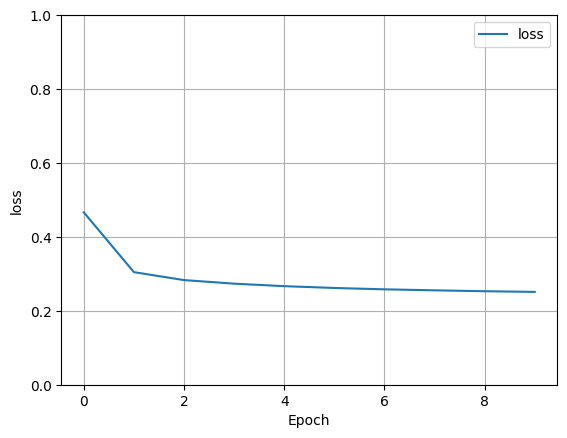

In [22]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [24]:
predict_ds = tf.data.Dataset.from_tensor_slices(x_test).batch(32)
result = model.predict(predict_ds, steps = 10)
print(result.shape)
print(result)

10/10 [==============================] - 0s 946us/step
(320, 10)
[[ -5.1963053  -17.93727     -3.809484   ...   9.258945    -2.2583826
    0.8327811 ]
 [  0.27460557  -5.620575     7.9283156  ... -33.371605    -2.0267563
  -26.601149  ]
 [ -8.513489     5.226363     0.9348357  ...  -2.990879    -0.39856756
   -3.1907022 ]
 ...
 [ -9.098013    -5.663724   -14.704968   ...  -6.824829     2.0443392
   -6.519617  ]
 [  1.0977821  -16.347586     1.9030879  ... -17.422562    -1.0874445
  -15.038196  ]
 [ -3.1563714  -13.84353     -5.009995   ... -23.808601     0.46601725
  -11.886008  ]]


This image is probably a 2
This image is probably a 1
This image is probably a 4
This image is probably a 7
This image is probably a 6


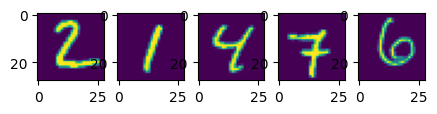

In [25]:
from operator import itemgetter
q = [1,5,6,75,100]
fig, axs = plt.subplots(1, 5, figsize=(5, 25))
for fig_idx, (idx, prediction) in enumerate(zip(q, itemgetter(1,5,6,75,100)(result))):
  axs[fig_idx].imshow(x_test[idx].reshape(28,28))
  pred_y = np.argmax(prediction)
  print(f"This image is probably a {pred_y}")

## 4

> 문제 4
---
1. 주어진 코드를 이용하여 fashion_mnist 데이터를 로드합니다. (데이터 형식은 numpy 배열)
2. numpy 배열(x_train, y_train)을 이용해서 tf.data.Dataset 을 생성합니다.
3. Dataset에서 랜덤하게 섞어서 3개의 이미지 shape과 label (바지, 드레스, 셔츠, 신발 등) 을 출력합니다.

```python
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

#1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)
```

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# 1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)


In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

image (28, 28)
label () Sneaker


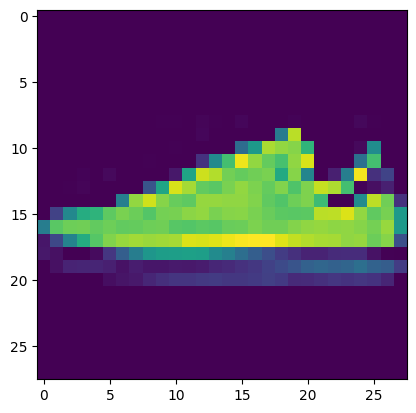

image (28, 28)
label () Trouser


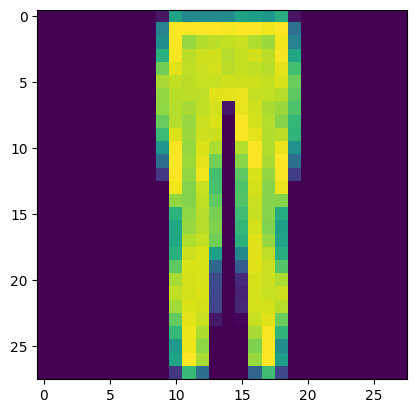

image (28, 28)
label () Sandal


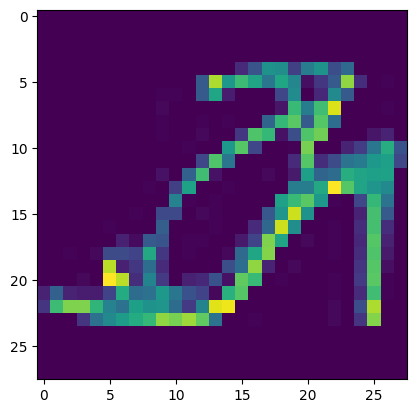

In [30]:
lables = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress', 
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

for image, label in train_dataset\
                            .map(lambda x, y: (x/255, y))\
                            .shuffle(100)\
                            .take(3):
  print('image', image.shape)
  print('label', label.shape, lables[label.numpy()])
  plt.figure()
  plt.imshow(image)
  plt.show()

x_train.shape= (60000, 28, 28)
y_train.shape= (60000,)
x_test.shape= (10000, 28, 28)
y_test.shape= (10000,)
image (28, 28)
label () Trouser


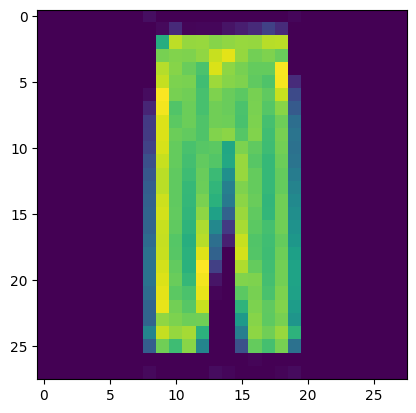

image (28, 28)
label () Ankle boot


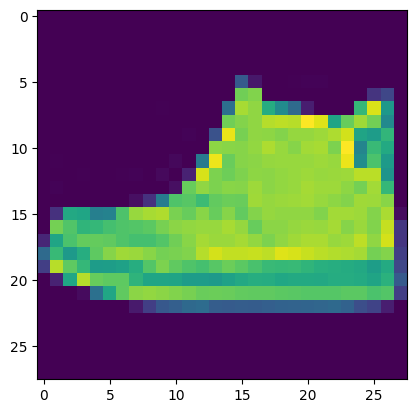

image (28, 28)
label () Coat


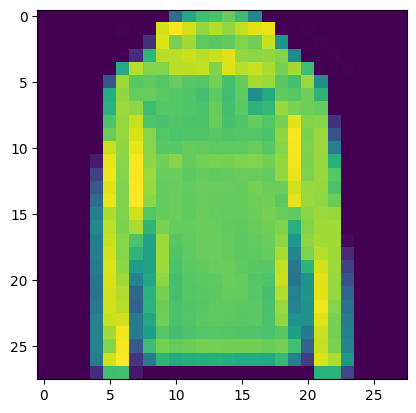

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# 1
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("x_train.shape=", x_train.shape) # (60000, 28, 28)
print("y_train.shape=", y_train.shape) # (60000,)
print("x_test.shape=",  x_test.shape)  # (10000, 28, 28)
print("y_test.shape=",  y_test.shape)  # (10000,)

#class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
#               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
lables = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress', 
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot',
}

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

for image, label in train_dataset\
                            .map(lambda x, y: (x/255, y))\
                            .shuffle(100)\
                            .take(3):
  print('image', image.shape)
  print('label', label.shape, lables[label.numpy()])
  plt.figure()
  plt.imshow(image)
  plt.show()